<a href="https://colab.research.google.com/github/FernandaSzAdr/KNN_cromossome/blob/master/TesteRedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.4 GB  | Proc size: 665.3 MB
GPU RAM Free: 11325MB | Used: 116MB | Util   1% | Total 11441MB


In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
train_path = 'drive/My Drive/base_crcn/Base/Train'
test_path = 'drive/My Drive/base_crcn/Base/Test'



---



## Implementação do código descrito em **"Crowdsourcing for Chromosome Segmentation and Deep Classification"**

In [0]:
bSize = 32

In [0]:
datagen = ImageDataGenerator(rescale=1/255.)

In [42]:
train_batches = datagen.flow_from_directory(train_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)
test_batches = datagen.flow_from_directory(test_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)

Found 5344 images belonging to 2 classes.
Found 1336 images belonging to 2 classes.


In [8]:
test_batches.class_indices

{'C': 0, 'NC': 1}



---



### 1 tentativa


In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(1024, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.summary()

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
stepsPerEpoche = len(train_batches)/bSize

In [21]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, epochs=50, verbose=2)

Epoch 1/50
 - 1s - loss: 0.7173 - acc: 0.4740
Epoch 2/50
 - 1s - loss: 0.6992 - acc: 0.5208
Epoch 3/50
 - 1s - loss: 0.6939 - acc: 0.4896
Epoch 4/50
 - 1s - loss: 0.6954 - acc: 0.4896
Epoch 5/50
 - 1s - loss: 0.7159 - acc: 0.5677
Epoch 6/50
 - 1s - loss: 0.7185 - acc: 0.5156
Epoch 7/50
 - 8s - loss: 0.7071 - acc: 0.4948
Epoch 8/50
 - 9s - loss: 0.6952 - acc: 0.5104
Epoch 9/50
 - 1s - loss: 0.7090 - acc: 0.4948
Epoch 10/50
 - 1s - loss: 0.7067 - acc: 0.4740
Epoch 11/50
 - 1s - loss: 0.6985 - acc: 0.4688
Epoch 12/50
 - 1s - loss: 0.7077 - acc: 0.4740
Epoch 13/50
 - 8s - loss: 0.6971 - acc: 0.5156
Epoch 14/50
 - 9s - loss: 0.7062 - acc: 0.4688
Epoch 15/50
 - 1s - loss: 0.7003 - acc: 0.5260
Epoch 16/50
 - 1s - loss: 0.6913 - acc: 0.5469
Epoch 17/50
 - 1s - loss: 0.6959 - acc: 0.5052
Epoch 18/50
 - 9s - loss: 0.7211 - acc: 0.4948
Epoch 19/50
 - 8s - loss: 0.7078 - acc: 0.4740
Epoch 20/50
 - 1s - loss: 0.7006 - acc: 0.5000
Epoch 21/50
 - 10s - loss: 0.7003 - acc: 0.4531
Epoch 22/50
 - 1s - l

In [0]:
model.save_weights('50_epochs_exemplo1.h5')



---



### 2 tentativa

In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
stepsPerEpoche = len(train_batches)/bSize

In [56]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, epochs=50, verbose=2)

Epoch 1/50
 - 2s - loss: 0.6932 - acc: 0.5000
Epoch 2/50
 - 1s - loss: 0.6932 - acc: 0.4688
Epoch 3/50
 - 1s - loss: 0.6925 - acc: 0.5938
Epoch 4/50
 - 1s - loss: 0.6914 - acc: 0.5938
Epoch 5/50
 - 1s - loss: 0.6909 - acc: 0.7240
Epoch 6/50
 - 1s - loss: 0.6897 - acc: 0.6979
Epoch 7/50
 - 1s - loss: 0.6882 - acc: 0.7448
Epoch 8/50
 - 1s - loss: 0.6882 - acc: 0.7031
Epoch 9/50
 - 1s - loss: 0.6883 - acc: 0.6615
Epoch 10/50
 - 1s - loss: 0.6850 - acc: 0.7344
Epoch 11/50
 - 1s - loss: 0.6869 - acc: 0.6406
Epoch 12/50
 - 1s - loss: 0.6845 - acc: 0.6927
Epoch 13/50
 - 1s - loss: 0.6836 - acc: 0.7083
Epoch 14/50
 - 1s - loss: 0.6796 - acc: 0.7500
Epoch 15/50
 - 1s - loss: 0.6739 - acc: 0.8125
Epoch 16/50
 - 1s - loss: 0.6805 - acc: 0.6823
Epoch 17/50
 - 1s - loss: 0.6710 - acc: 0.8125
Epoch 18/50
 - 1s - loss: 0.6624 - acc: 0.8750
Epoch 19/50
 - 1s - loss: 0.6674 - acc: 0.7812
Epoch 20/50
 - 1s - loss: 0.6663 - acc: 0.7552
Epoch 21/50
 - 1s - loss: 0.6592 - acc: 0.7812
Epoch 22/50
 - 1s - lo

In [0]:
model.save_weights('50_epochs_exemplo1_tentativa2.h5')

### 3 tentativa

Modelo criado pelo **Lucas Valentim**

https://github.com/lucasvalentim/chromosome-recognizer/blob/master/chromosome_recognizer.ipynb

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.summary()

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
stepsPerEpoche = len(train_batches)/bSize

In [22]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, epochs=30, verbose=2)

Epoch 1/30
 - 2s - loss: 1.1848 - acc: 0.6042
Epoch 2/30
 - 0s - loss: 0.7054 - acc: 0.7474
Epoch 3/30
 - 0s - loss: 0.4734 - acc: 0.8203
Epoch 4/30
 - 1s - loss: 0.2849 - acc: 0.9089
Epoch 5/30
 - 1s - loss: 0.3073 - acc: 0.8932
Epoch 6/30
 - 1s - loss: 0.3756 - acc: 0.8516
Epoch 7/30
 - 1s - loss: 0.2656 - acc: 0.9193
Epoch 8/30
 - 1s - loss: 0.3373 - acc: 0.8750
Epoch 9/30
 - 1s - loss: 0.2958 - acc: 0.8880
Epoch 10/30
 - 1s - loss: 0.2095 - acc: 0.9193
Epoch 11/30
 - 1s - loss: 0.2575 - acc: 0.9193
Epoch 12/30
 - 1s - loss: 0.3576 - acc: 0.8464
Epoch 13/30
 - 1s - loss: 0.2631 - acc: 0.9167
Epoch 14/30
 - 1s - loss: 0.2697 - acc: 0.9245
Epoch 15/30
 - 1s - loss: 0.3589 - acc: 0.8854
Epoch 16/30
 - 1s - loss: 0.2730 - acc: 0.8958
Epoch 17/30
 - 1s - loss: 0.2342 - acc: 0.9427
Epoch 18/30
 - 1s - loss: 0.2381 - acc: 0.9193
Epoch 19/30
 - 1s - loss: 0.2966 - acc: 0.8828
Epoch 20/30
 - 1s - loss: 0.2638 - acc: 0.9010
Epoch 21/30
 - 1s - loss: 0.3888 - acc: 0.8568
Epoch 22/30
 - 1s - lo

### 4 tentativa

Modelo adaptado do **Lucas Albertins**

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
stepsPerEpoche = len(train_batches)/bSize

In [10]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, epochs=30, verbose=2)

Epoch 1/30
 - 75s - loss: 0.5929 - acc: 0.7031
Epoch 2/30
 - 76s - loss: 0.4821 - acc: 0.8438
Epoch 3/30
 - 74s - loss: 0.2968 - acc: 0.8880
Epoch 4/30
 - 73s - loss: 0.3173 - acc: 0.8620
Epoch 5/30
 - 73s - loss: 0.2545 - acc: 0.9036
Epoch 6/30
 - 71s - loss: 0.2841 - acc: 0.9062
Epoch 7/30
 - 72s - loss: 0.1496 - acc: 0.9479
Epoch 8/30
 - 69s - loss: 0.2816 - acc: 0.9089
Epoch 9/30
 - 73s - loss: 0.2914 - acc: 0.8958
Epoch 10/30
 - 71s - loss: 0.3742 - acc: 0.8516
Epoch 11/30
 - 71s - loss: 0.3404 - acc: 0.8854
Epoch 12/30
 - 72s - loss: 0.2673 - acc: 0.8958
Epoch 13/30
 - 71s - loss: 0.2032 - acc: 0.9557
Epoch 14/30
 - 72s - loss: 0.2265 - acc: 0.9375
Epoch 15/30
 - 71s - loss: 0.2155 - acc: 0.9505
Epoch 16/30
 - 72s - loss: 0.2321 - acc: 0.9375
Epoch 17/30
 - 72s - loss: 0.1800 - acc: 0.9427
Epoch 18/30
 - 70s - loss: 0.2309 - acc: 0.9167
Epoch 19/30
 - 72s - loss: 0.2364 - acc: 0.9349
Epoch 20/30
 - 70s - loss: 0.3061 - acc: 0.8880
Epoch 21/30
 - 72s - loss: 0.2030 - acc: 0.9401
E

In [0]:
model.save_weights('30_epochs_exemplo1_tentativa3.h5')

### 5 tentativa

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
stepsPerEpoche = len(train_batches)/bSize

In [62]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, epochs=30, verbose=2)

Epoch 1/30
 - 3s - loss: 1.1862 - acc: 0.5755
Epoch 2/30
 - 1s - loss: 0.9307 - acc: 0.6562
Epoch 3/30
 - 1s - loss: 0.6890 - acc: 0.7422
Epoch 4/30
 - 1s - loss: 0.6586 - acc: 0.7760
Epoch 5/30
 - 1s - loss: 0.5062 - acc: 0.7995
Epoch 6/30
 - 1s - loss: 0.4317 - acc: 0.8255
Epoch 7/30
 - 1s - loss: 0.5070 - acc: 0.8203
Epoch 8/30
 - 1s - loss: 0.4476 - acc: 0.8411
Epoch 9/30
 - 1s - loss: 0.4132 - acc: 0.8594
Epoch 10/30
 - 1s - loss: 0.4208 - acc: 0.8646
Epoch 11/30
 - 1s - loss: 0.4211 - acc: 0.8438
Epoch 12/30
 - 1s - loss: 0.3867 - acc: 0.8646
Epoch 13/30
 - 1s - loss: 0.3282 - acc: 0.8750
Epoch 14/30
 - 1s - loss: 0.3877 - acc: 0.8620
Epoch 15/30
 - 1s - loss: 0.3113 - acc: 0.9193
Epoch 16/30
 - 1s - loss: 0.4160 - acc: 0.8672
Epoch 17/30
 - 1s - loss: 0.3628 - acc: 0.8854
Epoch 18/30
 - 1s - loss: 0.3778 - acc: 0.8698
Epoch 19/30
 - 1s - loss: 0.3078 - acc: 0.9036
Epoch 20/30
 - 1s - loss: 0.2651 - acc: 0.9167
Epoch 21/30
 - 1s - loss: 0.1983 - acc: 0.9505
Epoch 22/30
 - 1s - lo

In [0]:
model.save_weights('30_epochs_exemplo1_tentativa5_binary_crossentropy.h5')

### Graficos

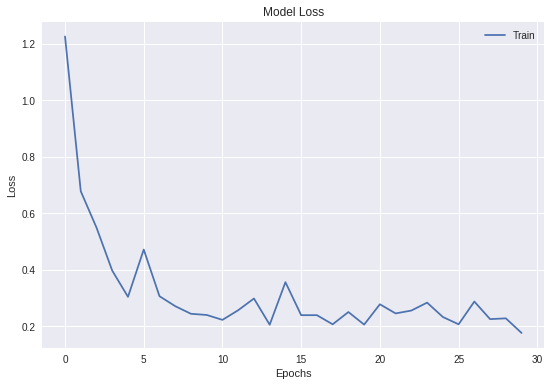

In [39]:
plt.figure(figsize=(9,6))
plt.plot(training.history['loss'], label='Train')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

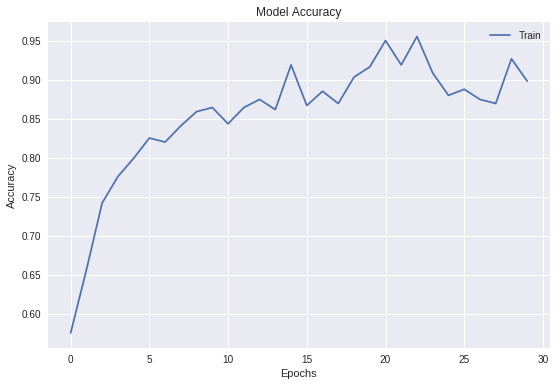

In [64]:
plt.figure(figsize=(9,6))
plt.plot(training.history['acc'], label='Train')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

## Implementação código do https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8

### 1 Teste

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, (3, 3), input_shape=(120, 120, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



---



In [0]:
bSize = 16

In [0]:
datagen = ImageDataGenerator(rescale=1/255.)

In [11]:
train_batches = datagen.flow_from_directory(train_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)
test_batches = datagen.flow_from_directory(test_path, target_size=(120, 120), classes=['C', 'NC'], batch_size=bSize)

Found 5344 images belonging to 2 classes.
Found 1336 images belonging to 2 classes.


In [0]:
stepsPerEpoche = len(train_batches)/bSize

In [0]:
model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                    epochs=5, verbose=2)


In [0]:
model.save_weights('25_epochs_exemplo2.h5')

In [11]:
model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                    epochs=50, verbose=2)

Epoch 1/50
 - 2s - loss: 0.7353 - acc: 0.4940
Epoch 2/50
 - 1s - loss: 0.6482 - acc: 0.6443
Epoch 3/50
 - 1s - loss: 0.5639 - acc: 0.7693
Epoch 4/50
 - 1s - loss: 0.5024 - acc: 0.7723
Epoch 5/50
 - 1s - loss: 0.4525 - acc: 0.7812
Epoch 6/50
 - 1s - loss: 0.3668 - acc: 0.8631
Epoch 7/50
 - 1s - loss: 0.3639 - acc: 0.8646
Epoch 8/50
 - 1s - loss: 0.3626 - acc: 0.8586
Epoch 9/50
 - 1s - loss: 0.3493 - acc: 0.8527
Epoch 10/50
 - 1s - loss: 0.2751 - acc: 0.8958
Epoch 11/50
 - 1s - loss: 0.4273 - acc: 0.8646
Epoch 12/50
 - 1s - loss: 0.3008 - acc: 0.9241
Epoch 13/50
 - 1s - loss: 0.3326 - acc: 0.8795
Epoch 14/50
 - 1s - loss: 0.2798 - acc: 0.8824
Epoch 15/50
 - 1s - loss: 0.3081 - acc: 0.8899
Epoch 16/50
 - 1s - loss: 0.3306 - acc: 0.8914
Epoch 17/50
 - 1s - loss: 0.3057 - acc: 0.8810
Epoch 18/50
 - 1s - loss: 0.2491 - acc: 0.9226
Epoch 19/50
 - 1s - loss: 0.2335 - acc: 0.9301
Epoch 20/50
 - 1s - loss: 0.3320 - acc: 0.9077
Epoch 21/50
 - 1s - loss: 0.2576 - acc: 0.9167
Epoch 22/50
 - 1s - lo

In [0]:
model.save_weights('50_epochs_exemplo2.h5')

### 2 Teste